 Group Members:

|Name | Roll No |
|-------- | -------- |
|M Ahzam Hassan | 20F-0144 |
|Hamza Idrees | 20F-0132 |
|Rabia Roman | 20F-0200 |

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Data Acquisition and Preprocessing

In [55]:
# Reading JSON file in a DataFrame
Data = pd.read_json('electronics.json')

electronicsDataFrame = pd.DataFrame(Data)
electronicsDataFrame.head(5)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


In [56]:
# Necessary varibles will be defined here
numericColumns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']
categoricalColumns = ['Income_Level', 'Gender', 'Brand', 'Season', 'Product_Category_Preferences', 'Product_Category']
numericalColumnsForOutliers = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', "Purchase_Frequency_Per_Month", "Brand_Affinity_Score" ]


## Data Acquisition

In [57]:
electronicsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

#### Customer DemoGraphics:
- Customer_ID
- Age
- Gender
- Income_Level
- Address

#### Product Details
- Product_Id
- Product_Category
- Brand

#### Purchase History
- Transaction_ID
- Purchase_Date
- Purchase_Amount
- Purchase_Frequency_Per_Month
- Brand_Affinity_Score

#### Spending Amounts
- Purchase_Amount
- Average_Spending_Per_Purchase

#### Dates of Transaction
- Purchase_Date
- Month
- Year
- Season

## Data Cleaning 

In [58]:
# Check for missing values
electronicsDataFrame.isnull().sum()


Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

### - Missing Values
From above cell we can see we do not have any missing values in our Data, It is because, currently, the values are all of string type. We need to find the missing and non standard values considering the string column types. 

In [59]:
# Check for non-standard or missing values in all columns
electronicsDataFrame.apply(lambda x: x.isin(['N/A', 'NA', '','Hidden']).sum())


Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

### - Missing Values
Now we can see we have some missing values, lets manage these missing values.

##### - Managed Column Types
For now, all the columns are of string data type, We will convert the columns holding numeric data to numeric type using (to_numeric) function of Pandas, columns holding date to date type using (to_datetime) function of pandas.

In [60]:
# Converting numeric columns 
electronicsDataFrame[numericColumns] = electronicsDataFrame[numericColumns].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Converting Date column to datetime type
electronicsDataFrame['Purchase_Date'] = pd.to_datetime(electronicsDataFrame['Purchase_Date'], errors='coerce')

# Ocnverting Categorical columns to category type
electronicsDataFrame[categoricalColumns] = electronicsDataFrame[categoricalColumns].astype('category')


electronicsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    1000 non-null   object        
 1   Age                            960 non-null    float64       
 2   Gender                         1000 non-null   category      
 3   Income_Level                   1000 non-null   category      
 4   Address                        1000 non-null   object        
 5   Transaction_ID                 1000 non-null   object        
 6   Purchase_Date                  952 non-null    datetime64[ns]
 7   Product_ID                     1000 non-null   object        
 8   Product_Category               1000 non-null   category      
 9   Brand                          1000 non-null   category      
 10  Purchase_Amount                951 non-null    float64       
 11  Average_Spending_P

In [61]:
# Check for non string columns
print(electronicsDataFrame.isnull().sum())
# Check for string columns
print(electronicsDataFrame.apply(lambda x: x.isin(['N/A', 'NA', '','Hidden']).sum()))

Customer_ID                       0
Age                              40
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                    0
Purchase_Date                    48
Product_ID                        0
Product_Category                  0
Brand                             0
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences      0
Month                            53
Year                             52
Season                            0
dtype: int64
Customer_ID                      44
Age                               0
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                     0
Product_ID                       49
Product_Category                 60
Brand          

##### - Fill missing values
Filling the missing values. All the missing values in numerical Columns are replaced with the mean of the column data, The Date column is filled via forward fill method, The missing values in categorical columns are replaced with Mode of the column data, the missing values in rest of the columns are replaced with default value. 

In [62]:
def replace_with_mode(column):
    return column.replace(['N/A', 'NA', '', 'Hidden'], column.mode()[0])


electronicsDataFrame[numericColumns] = electronicsDataFrame[numericColumns].apply(lambda x: x.fillna(x.mean())).astype('int')

electronicsDataFrame['Purchase_Date'] = electronicsDataFrame['Purchase_Date'].fillna(method='ffill')

electronicsDataFrame[categoricalColumns] = electronicsDataFrame[categoricalColumns].apply(replace_with_mode)


electronicsDataFrame['Address'].replace(['N/A', 'NA', '', 'Hidden'], 'Unknown Address', inplace=True)
electronicsDataFrame['Transaction_ID'].replace(['N/A', 'NA', '', 'Hidden'], 'Unknown Transaction_ID', inplace=True)
electronicsDataFrame['Product_ID'].replace(['N/A', 'NA', '', 'Hidden'], 'Unknown Product_ID', inplace=True)
electronicsDataFrame['Customer_ID'].replace(['N/A', 'NA', '', 'Hidden'], 'Unknown Customer_ID', inplace=True)


##### - Missing Values managed
The result of the null or non-standard values after managing them is displayd bellow.
- the numeric columns are filled with the mean values of the column's data
- purchase date column is filed via forward fill method
- categorical columns are filled with the mode of the specific column
- all the string columns are filled with a default value

In [63]:
# Check for non string columns
print("Numeric Nulls")
print(electronicsDataFrame.isnull().sum())

# Check for string columns
print("Non-numeric Nulls")
print(electronicsDataFrame.apply(lambda x: x.isin(['N/A', 'NA', '']).sum()))

electronicsDataFrame

Numeric Nulls
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64
Non-numeric Nulls
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand     

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter
1,Unknown Customer_ID,25,Male,High,Unknown Address,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,8,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,6,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Unknown Customer_ID,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,5,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,9,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,250,98,8,7,Low,3,2000,Fall


### - Outliers
Lets Identify outliers in the data, we will be working on the numeric columns only.

#### - IQR Method
First we will be using mathematical way(IQR Method) to identify the Outliers


In [64]:
# Using IQR method to analyze the outliers.
# Only numeric columns are considered for the outlier analysis

def identify_outliers(column):
    # Calculate the IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifing outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return lower_bound, upper_bound, outliers

# Looping through each numerical column to identify column wise outliers
for col in numericalColumnsForOutliers:
    lower_bound, upper_bound, outliers = identify_outliers(electronicsDataFrame[col])
    
    print(f"\nColumn: {col}")
    print("Lower bound = ", lower_bound)
    print("Upper bound = ", upper_bound)
    print("Identified Outliers = ", outliers)


Column: Age
Lower bound =  -11.5
Upper bound =  112.5
Identified Outliers =  Series([], Name: Age, dtype: int32)

Column: Purchase_Amount
Lower bound =  -211.0
Upper bound =  717.0
Identified Outliers =  Series([], Name: Purchase_Amount, dtype: int32)

Column: Average_Spending_Per_Purchase
Lower bound =  -34.875
Upper bound =  138.125
Identified Outliers =  Series([], Name: Average_Spending_Per_Purchase, dtype: int32)

Column: Purchase_Frequency_Per_Month
Lower bound =  -4.5
Upper bound =  15.5
Identified Outliers =  Series([], Name: Purchase_Frequency_Per_Month, dtype: int32)

Column: Brand_Affinity_Score
Lower bound =  -4.5
Upper bound =  15.5
Identified Outliers =  Series([], Name: Brand_Affinity_Score, dtype: int32)


#### - Visualization
Now, we will visualize our data to see any visual inconsistency or outlier in our data


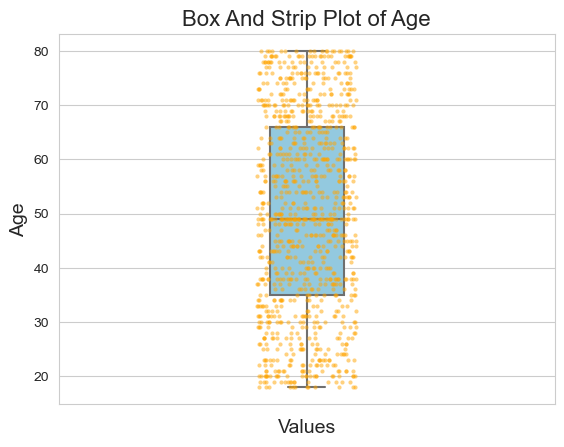

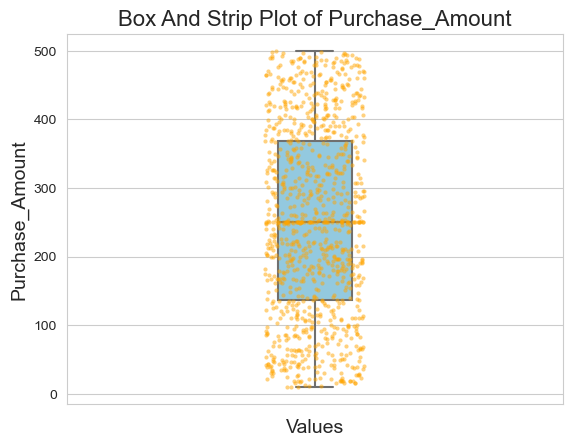

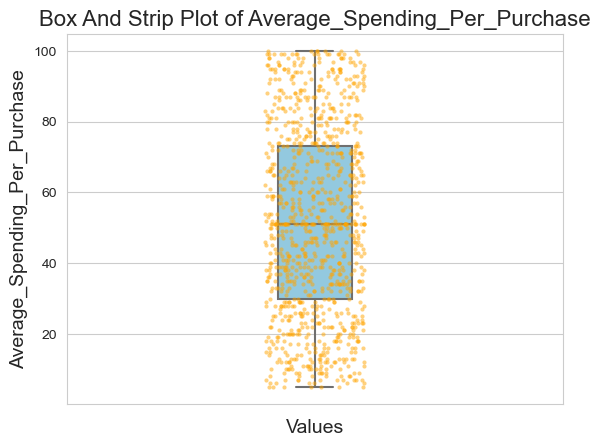

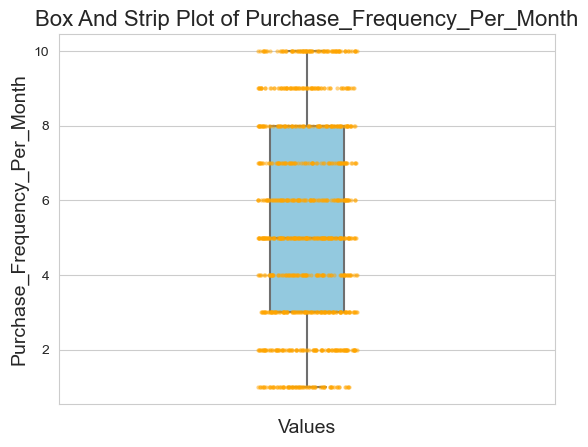

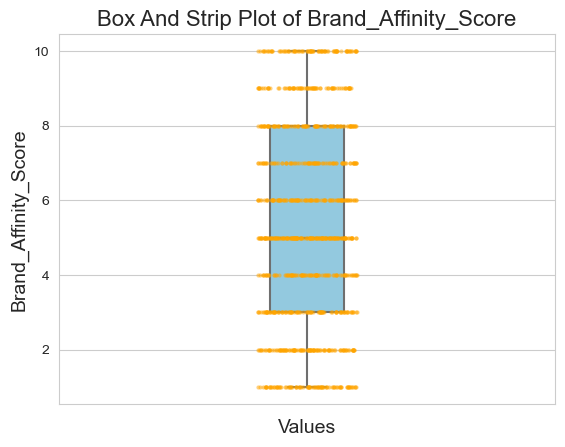

In [65]:
# Using combined Box and Strip plot to analyze the outliers.
# Only numeric columns are considered for the outlier analysis

# Setting grid style
sns.set_style("whitegrid")

# Looping to create loop for individual column
for col in numericalColumnsForOutliers:
    
    # Using boxplot with stripplot to show individual data points
    sns.boxplot(y=electronicsDataFrame[col], width=0.15, color='skyblue')
    sns.stripplot(y=electronicsDataFrame[col], color='orange', size=3, alpha=0.5)
    
    plt.title(f'Box And Strip Plot of {col}', fontsize=16)
    plt.xlabel('Values', fontsize=14)
    plt.ylabel(col, fontsize=14)
    
    plt.show()

#### - Outliers Decision
We have not found any outlier in the data with any of the methods we used above. 



## Data Transformation

#### New Features
- Average spending per purchase
- Purchase frequency per month
- Brand affinity score 
- Product category preferences

Added Successfully

#### Standardize numeric features


In [66]:
# for standardization and normalization

standardizedDF = electronicsDataFrame.copy()
#Standardize or normalize numeric features
standardizedDF[numericColumns] = StandardScaler().fit_transform(electronicsDataFrame[numericColumns])
standardizedDF[numericColumns]

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year
0,-0.544191,-0.419065,0.279577,-1.233777,-1.214677,-1.651777,0.861320
1,-1.372908,0.490380,0.957705,-1.233777,-1.577592,0.437191,-0.530043
2,0.395022,-0.389963,1.824202,1.296677,-1.577592,-0.159657,-0.132511
3,-0.654687,0.082949,1.711181,-0.872283,-0.488847,0.735615,0.993831
4,1.002748,1.297967,1.259096,0.573690,-1.214677,-1.651777,0.861320
...,...,...,...,...,...,...,...
995,1.113244,-0.513647,1.522812,-1.233777,-0.125932,-0.458081,-0.662554
996,1.555226,-0.542750,0.053534,-0.872283,-0.851762,0.735615,-1.325108
997,0.726509,-0.280829,1.786528,-1.233777,1.325729,1.630887,-0.132511
998,-0.378448,-0.004358,1.748855,0.935183,0.599899,-1.054929,0.198766


# Exploratory Data Analysis

## Univariate Analysis

#### Customer Age
- People of Age around 50 are at top of the list in shopping with a hug difference, people of Age around 80 are at second.
- There is no outliers in data

#### Purchase Amount
- The purchase amount near 250 has highest Frequency
- There are no outliers in data

#### Purchase Frequency Per Month
- The maximux count of purchase frequency per month is 5
- There are no outliers in data

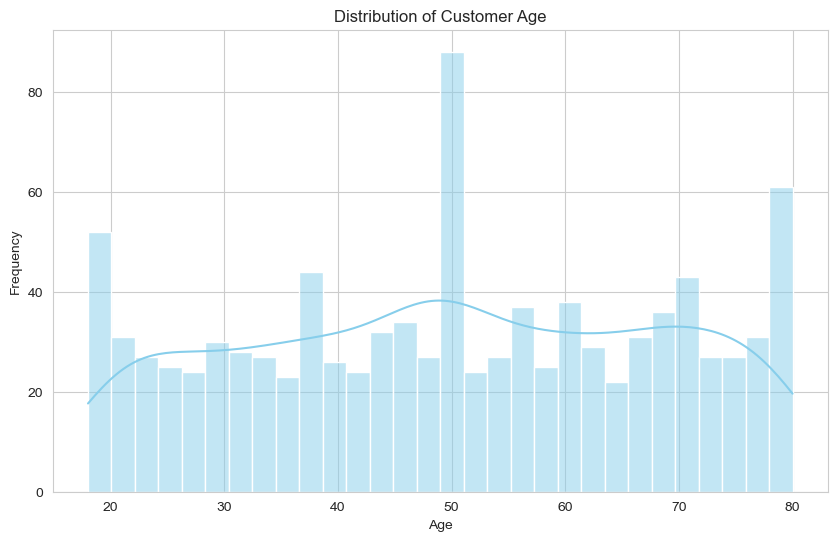

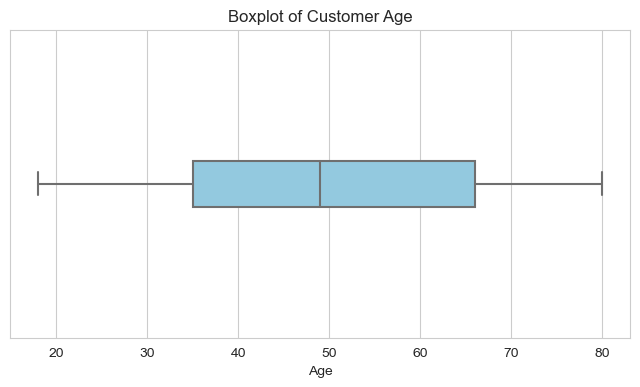

count    1000.000000
mean       49.850000
std        18.109319
min        18.000000
25%        35.000000
50%        49.000000
75%        66.000000
max        80.000000
Name: Age, dtype: float64


In [89]:
# Customer Age

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(electronicsDataFrame['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=electronicsDataFrame['Age'], color='skyblue', width=0.15)
plt.title('Boxplot of Customer Age')
plt.xlabel('Age')
plt.show()

# Descriptive Statistics
age_stats = electronicsDataFrame['Age'].describe()
print(age_stats)


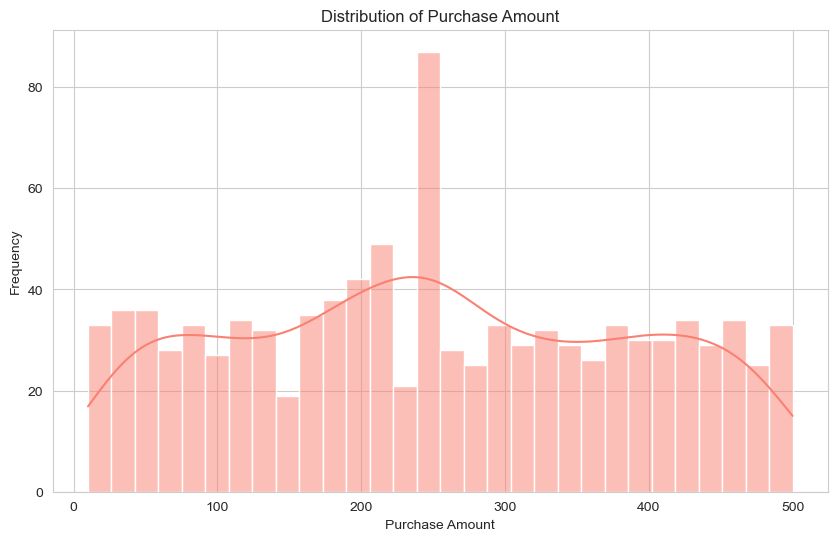

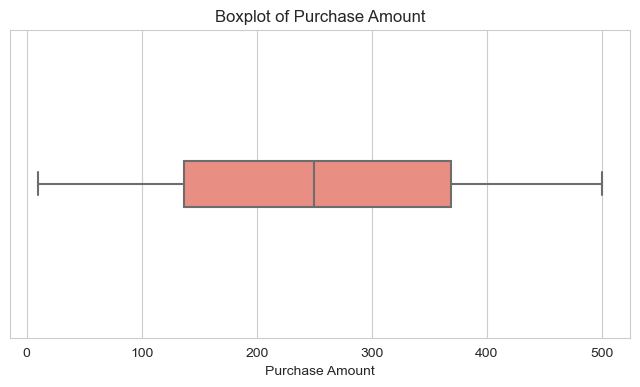

count    1000.000000
mean      250.599000
std       137.515223
min        10.000000
25%       137.000000
50%       250.000000
75%       369.000000
max       500.000000
Name: Purchase_Amount, dtype: float64


In [68]:
# Purchase Amount

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(electronicsDataFrame['Purchase_Amount'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=electronicsDataFrame['Purchase_Amount'], color='salmon', width=0.15)
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

# Descriptive Statistics
purchase_amount_stats = electronicsDataFrame['Purchase_Amount'].describe()
print(purchase_amount_stats)


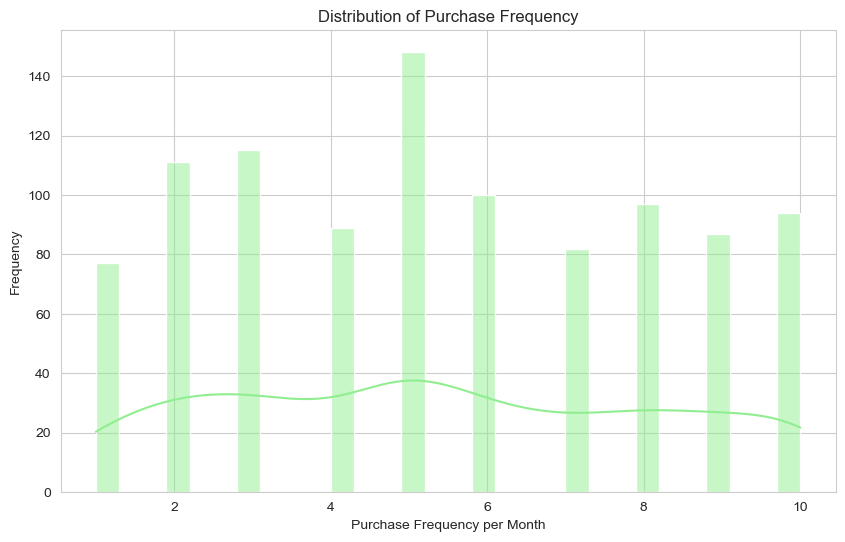

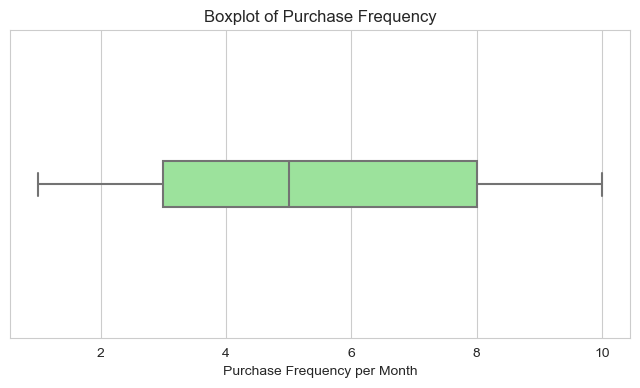

count    1000.000000
mean        5.413000
std         2.767687
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64


In [69]:
# Purchase Frequency Per Month

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(electronicsDataFrame['Purchase_Frequency_Per_Month'], bins=30, kde=, color='lightgreen')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency per Month')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=electronicsDataFrame['Purchase_Frequency_Per_Month'], color='lightgreen', width=0.15)
plt.title('Boxplot of Purchase Frequency')
plt.xlabel('Purchase Frequency per Month')
plt.show()

# Descriptive Statistics
purchase_frequency_stats = electronicsDataFrame['Purchase_Frequency_Per_Month'].describe()
print(purchase_frequency_stats)


## Bivariate Analysis

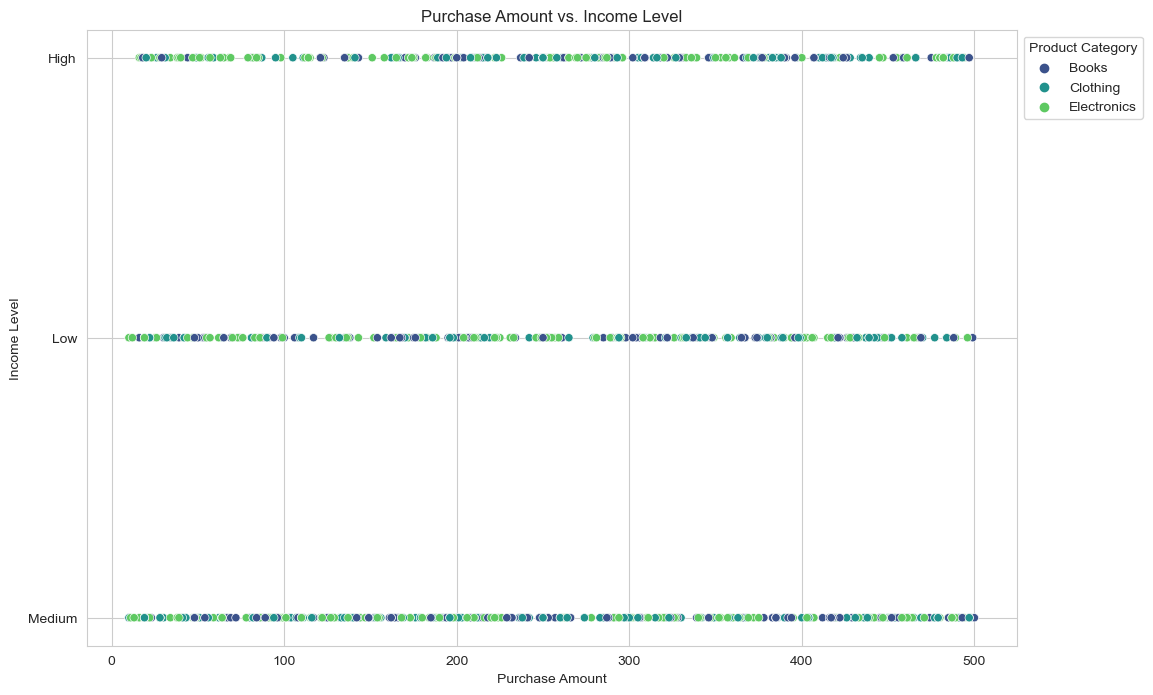

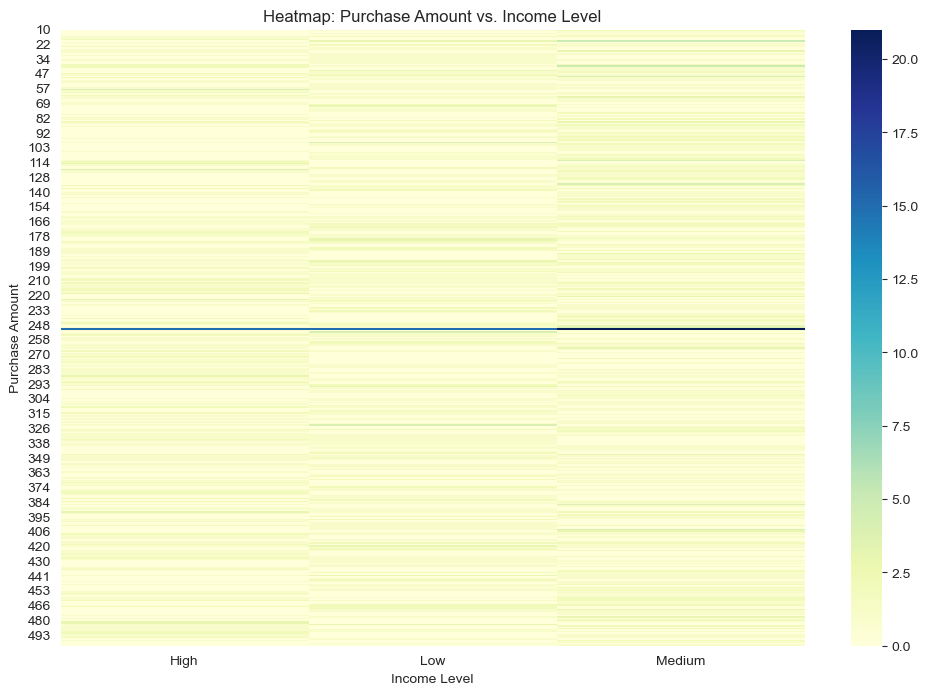

In [70]:
# purchase amount vs Income level

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Purchase_Amount', y='Income_Level', data=electronicsDataFrame, hue='Product_Category', palette='viridis')
plt.title('Purchase Amount vs. Income Level')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

# Grouping Data for heat map
heatmap_data = electronicsDataFrame.groupby(['Purchase_Amount', 'Income_Level']).size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Purchase Amount vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.show()

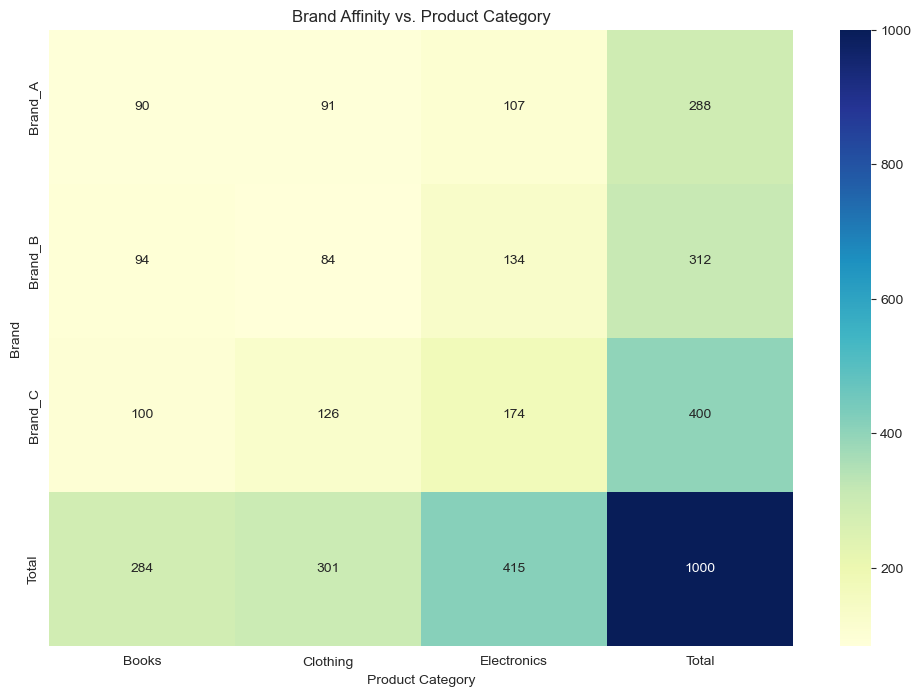

In [71]:
# Brand Affinity vs Product Category
# Heatmap
brand_category_heatmap = pd.crosstab(electronicsDataFrame['Brand'], electronicsDataFrame['Product_Category'], margins=True, margins_name='Total')
plt.figure(figsize=(12, 8))
sns.heatmap(brand_category_heatmap, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('Brand Affinity vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Brand')
plt.show()


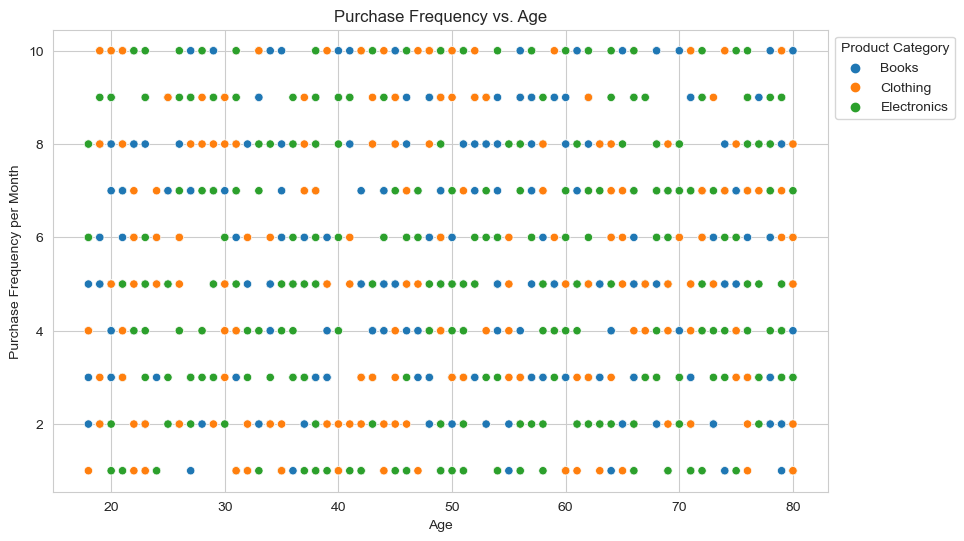

In [72]:
# Purchase Frequency vs Age
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase_Frequency_Per_Month', data=electronicsDataFrame,hue='Product_Category', color='orange')
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency per Month')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()


## Temporal Analysis
### Trends Over Time

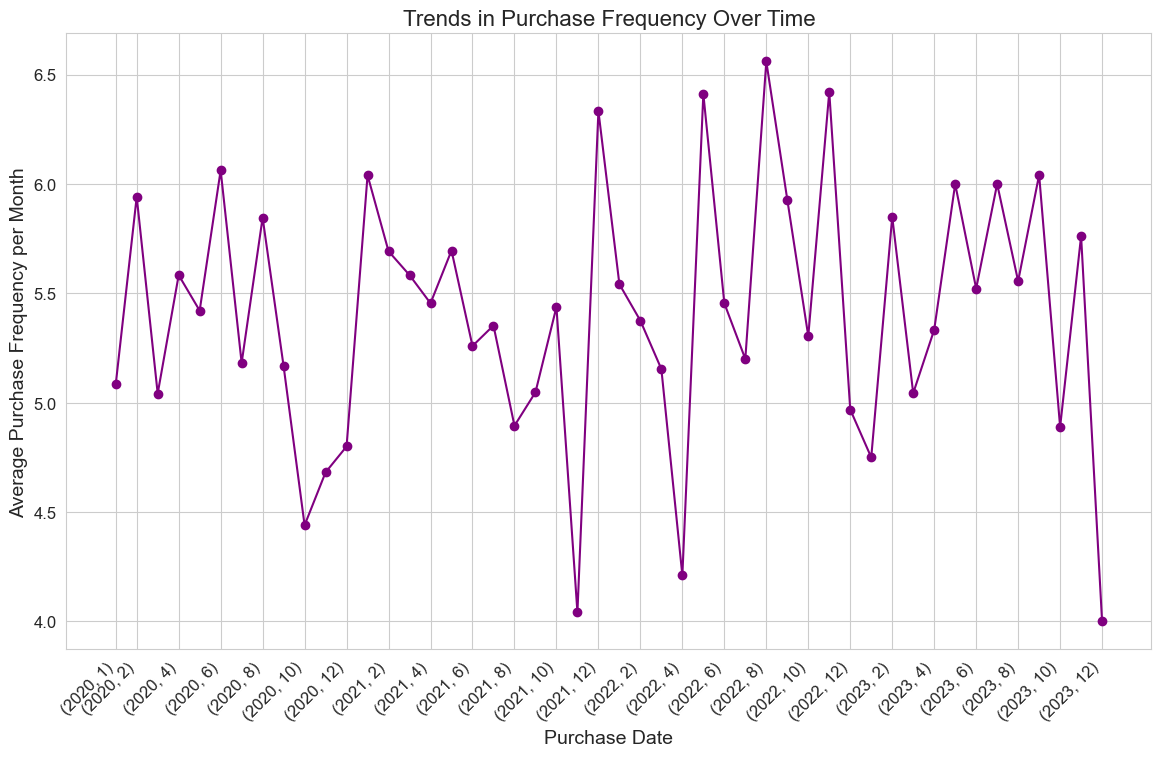

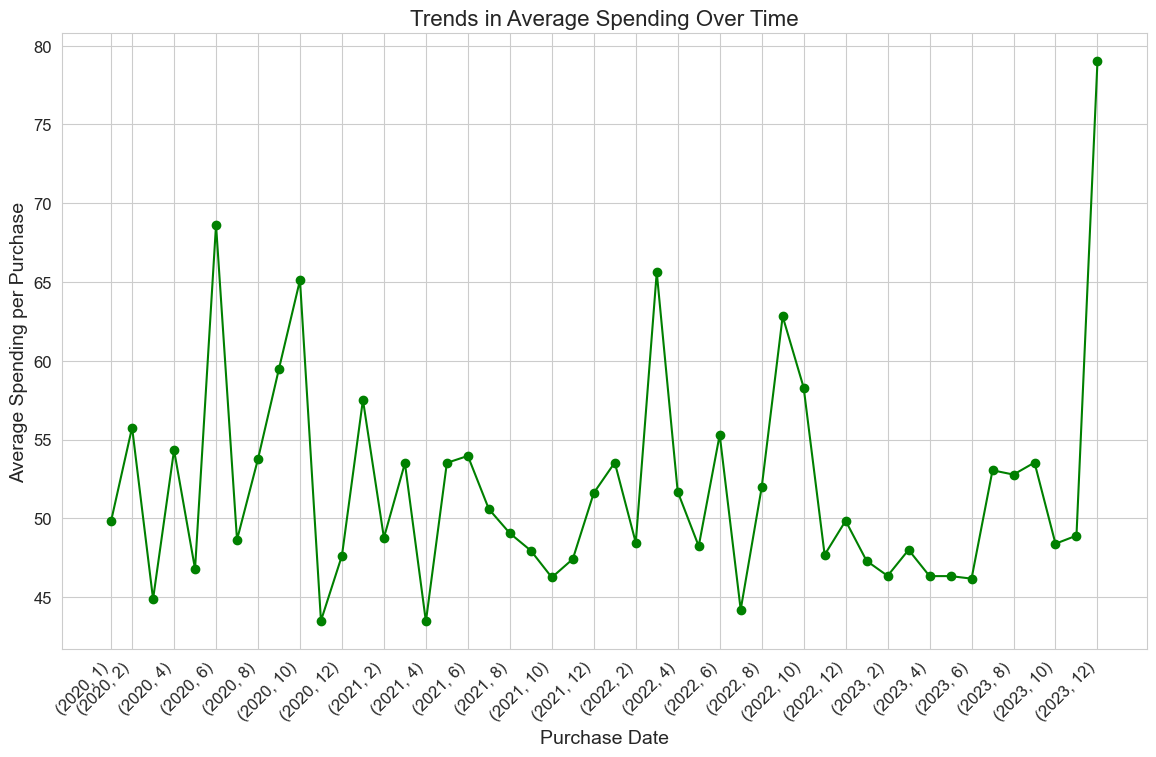

<Figure size 1400x800 with 0 Axes>

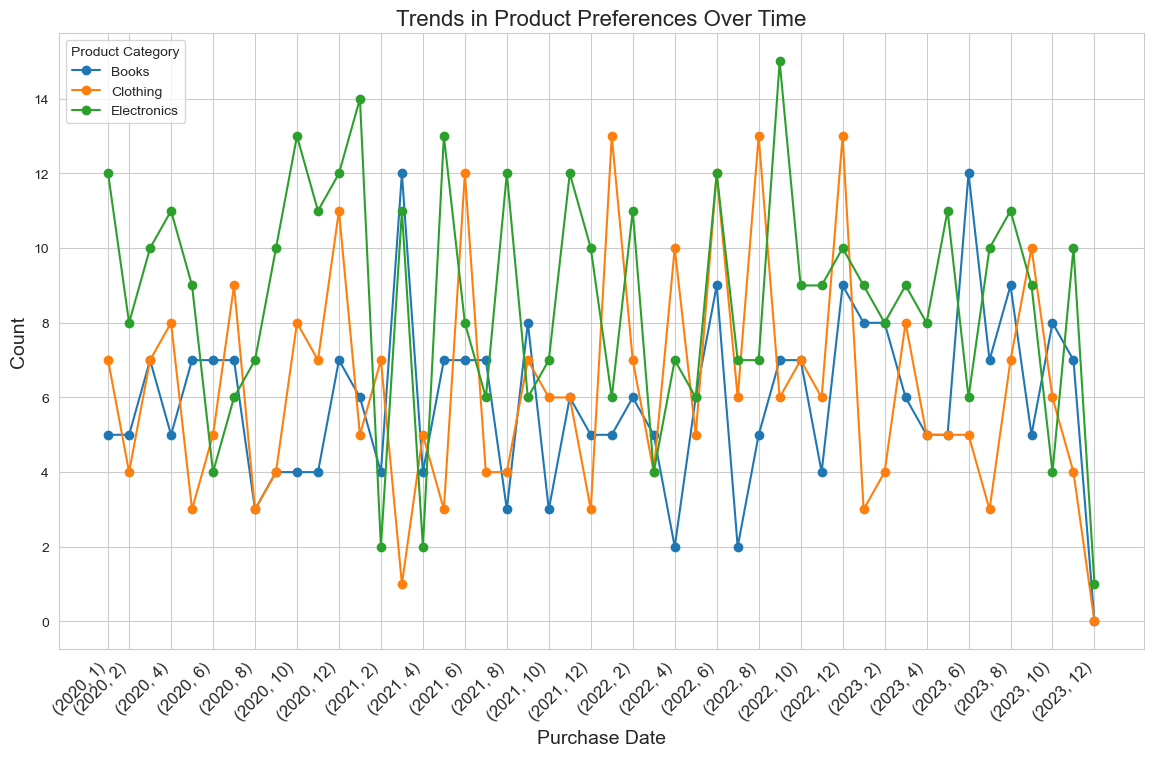

In [73]:
# Trends in Purchase Frequency
purchase_frequency_trends = electronicsDataFrame.groupby([electronicsDataFrame['Purchase_Date'].dt.year, electronicsDataFrame['Purchase_Date'].dt.month])['Purchase_Frequency_Per_Month'].mean()
plt.figure(figsize=(14, 8))
purchase_frequency_trends.plot(marker='o', linestyle='-', color='purple')
plt.title('Trends in Purchase Frequency Over Time',fontsize=16)
plt.xlabel('Purchase Date',fontsize=14)
plt.ylabel('Average Purchase Frequency per Month',fontsize=14)

ticks = np.linspace(0, len(purchase_frequency_trends)-1, 25, dtype=int)
plt.xticks(ticks, purchase_frequency_trends.index[ticks], rotation=45,fontsize=12,ha='right')
plt.yticks(fontsize=12)
plt.show()

# Trends in Average Spending
average_spending_trends = electronicsDataFrame.groupby([electronicsDataFrame['Purchase_Date'].dt.year, electronicsDataFrame['Purchase_Date'].dt.month])['Average_Spending_Per_Purchase'].mean()
plt.figure(figsize=(14, 8))
average_spending_trends.plot(marker='o', linestyle='-', color='green')
plt.title('Trends in Average Spending Over Time',fontsize=16)
plt.xlabel('Purchase Date',fontsize=14)
plt.ylabel('Average Spending per Purchase',fontsize=14)

ticks = np.linspace(0, len(average_spending_trends)-1, 25, dtype=int)
plt.xticks(ticks, average_spending_trends.index[ticks], rotation=45,fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

# Trends in Product Preferences
product_category_trends = electronicsDataFrame.groupby([electronicsDataFrame['Purchase_Date'].dt.year, electronicsDataFrame['Purchase_Date'].dt.month])['Product_Category'].value_counts().unstack()
plt.figure(figsize=(14, 8))
product_category_trends.plot(marker='o', linestyle='-',figsize=(14, 8))
# sns.lineplot(data=product_category_trends, markers=True)
plt.title('Trends in Product Preferences Over Time',fontsize=16)
plt.xlabel('Purchase Date', fontsize=14)
plt.ylabel('Count', fontsize=14)

ticks = np.linspace(0, len(product_category_trends)-1, 25, dtype=int)
plt.xticks(ticks,product_category_trends.index[ticks] ,rotation=45,fontsize=12, ha='right')
plt.legend(title='Product Category', loc='upper left')
plt.show()



### Seasonal Variations

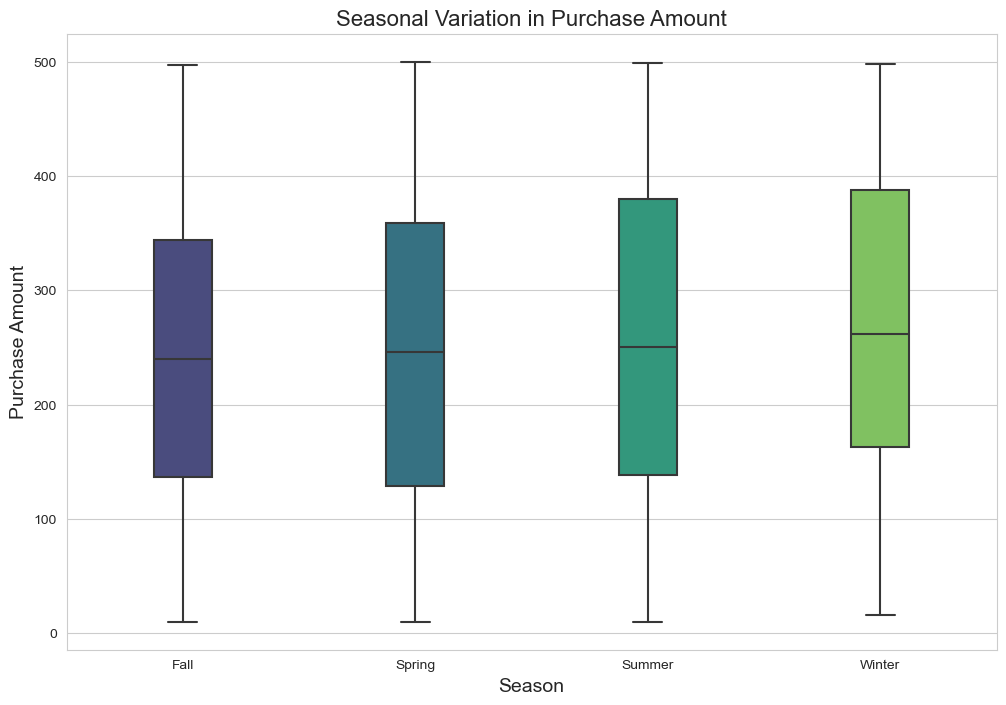

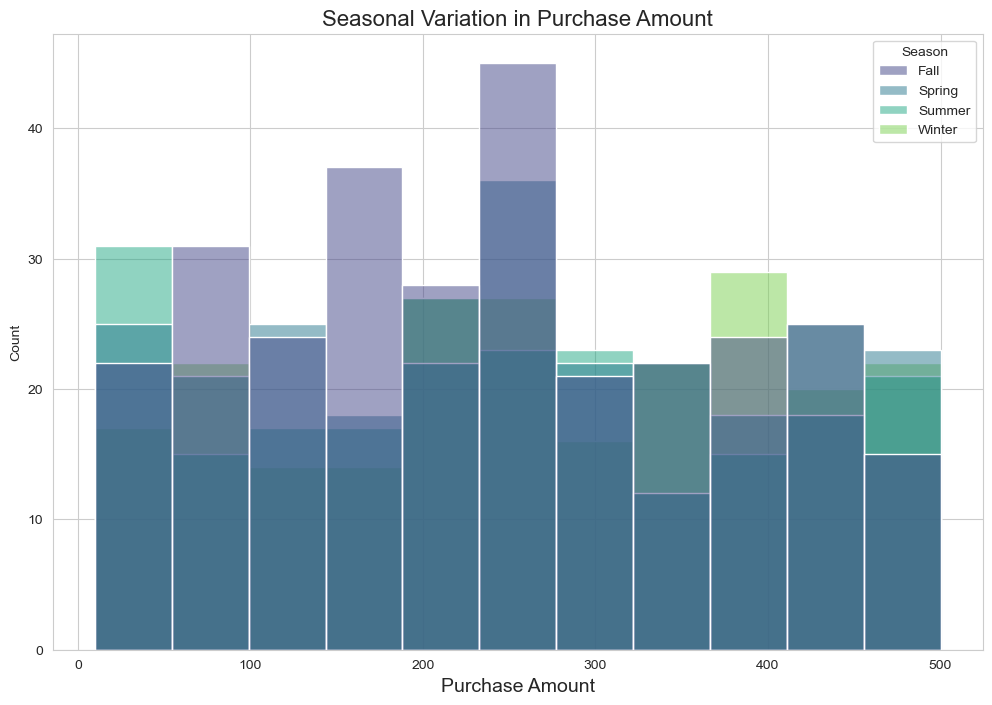

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Purchase_Amount', data=electronicsDataFrame, palette='viridis', width=0.25)
plt.title('Seasonal Variation in Purchase Amount',fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(x='Purchase_Amount', data=electronicsDataFrame,hue='Season' ,palette='viridis')
plt.title('Seasonal Variation in Purchase Amount',fontsize=16)
plt.xlabel('Purchase Amount', fontsize=14)
plt.show()

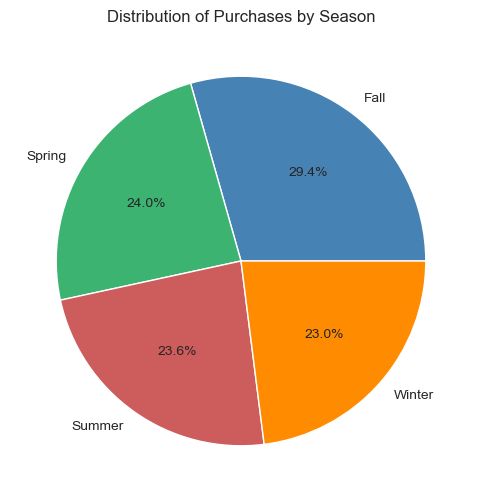

In [75]:
season_counts = electronicsDataFrame['Season'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['steelblue', 'mediumseagreen', 'indianred', 'darkorange'])

plt.gca().set_aspect('equal')

plt.title('Distribution of Purchases by Season')
plt.show()

In [76]:
seasonal_analysis = electronicsDataFrame.groupby('Season')['Purchase_Amount'].describe()
print("Seasonal Variation W.R.T Purchase Amount:")
print(seasonal_analysis)

Seasonal Variation W.R.T Purchase Amount:
        count        mean         std   min     25%    50%     75%    max
Season                                                                   
Fall    294.0  240.163265  128.939097  10.0  137.00  239.5  343.75  497.0
Spring  240.0  243.625000  140.763522  10.0  128.75  246.0  358.75  500.0
Summer  236.0  253.724576  143.225475  10.0  138.50  250.0  380.25  499.0
Winter  230.0  268.008696  137.797586  16.0  162.50  261.5  387.75  498.0


# Clustering Analysis

In [77]:
# Performing PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardizedDF[['Age', 'Purchase_Amount']])
standardizedDF['PCA1'] = pca_result[:, 0]
standardizedDF['PCA2'] = pca_result[:, 1]


## K-Means Clustering

### Define No of Clusters
- Elbow Method

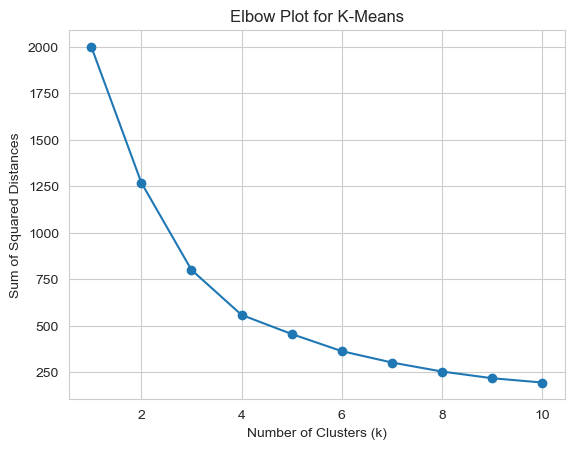

In [78]:

# Elbow method
# sum of squared distances
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standardizedDF[['Age', 'Purchase_Amount']])
    sse.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-Means')
plt.show()


- Silhouette analysis

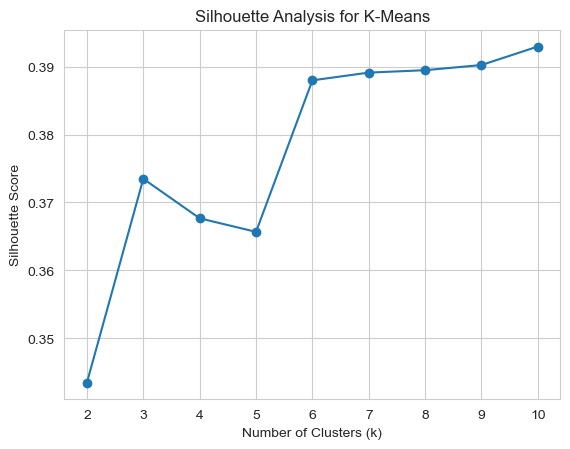

In [79]:
# Silhouette analysis
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standardizedDF[['Age', 'Purchase_Amount']])
    sil_score = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], kmeans.labels_)
    sil_scores.append(sil_score)

# Plotting silhouette scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.show()

- Elbow Value

In [80]:
# Finding the elbow value
elbow_value = None
for i in range(1, len(sse)-1):
    if (sse[i] - sse[i+1]) / (sse[i-1] - sse[i]) < 0.5:  
        elbow_value = i + 1
        break

print(f'The elbow value is: {elbow_value}')

The elbow value is: 4


### K-Means Algorithm

Cluster Characteristics for K-Means:
                     Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans_Cluster                                                             
0              -0.728599         1.058300                      -0.049135   
1               0.791738        -0.944036                      -0.076583   
2              -0.898349        -0.664452                       0.118100   
3               0.935346         0.729717                      -0.020457   

                Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
KMeans_Cluster                                                                 
0                                  -0.012515              0.008118 -0.060182   
1                                  -0.005003              0.011305 -0.039284   
2                                  -0.010932             -0.028320 -0.042345   
3                                   0.028558              0.014880  0.139961   

                    Year 

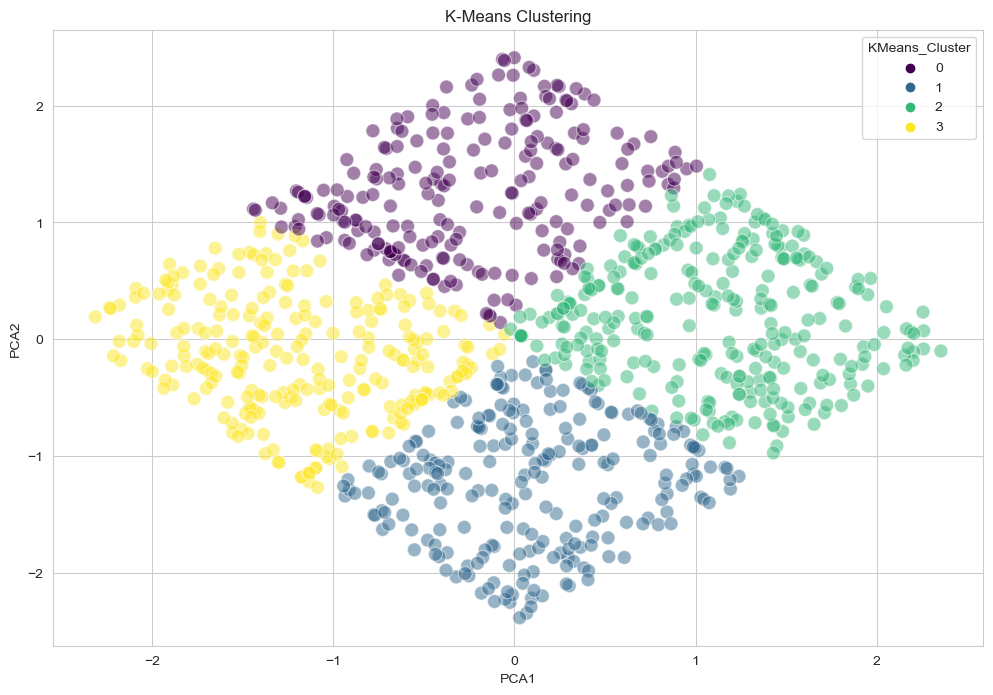

In [81]:

k_optimal = elbow_value
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
standardizedDF['KMeans_Cluster'] = kmeans.fit_predict(standardizedDF[['Age', 'Purchase_Amount']])

# 3. Analyze cluster characteristics:
cluster_characteristics = standardizedDF.groupby('KMeans_Cluster').mean(numeric_only=True)
print("Cluster Characteristics for K-Means:")
print(cluster_characteristics)

# Visualize the clusters if you performed PCA
plt.figure(figsize=(12,8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=standardizedDF, palette='viridis', s=100, alpha=0.5)
plt.title('K-Means Clustering')
plt.show()

### Cluster SImilarities and Differences
- Cluster 0: Customers with higher age and higher purchase amount.
- Cluster 1: Customers with moderate age and lower purchase amount.
- Cluster 2: Customers with lower age and moderate purchase amount.
- Cluster 3: Customers with higher age and moderate purchase amount.

## DBSCAN Clustering

#### EPS Value

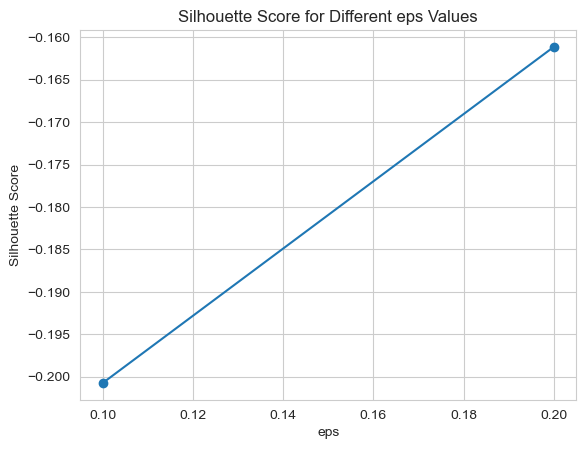

Optimal eps value: 0.2


In [82]:
# Range of eps values 
eps_values = np.arange(0.1, 2.0, 0.1)

# Store silhouette scores for each eps value
silhouette_scores = []

for eps in eps_values:

    dbscan = DBSCAN(eps=eps, min_samples=5)  
    labels = dbscan.fit_predict(standardizedDF[['Age', 'Purchase_Amount']])
    
    # Checking if we have multiple clusters
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        # Silhouette score only if multiple clusters
        silhouette = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(np.nan) 

# Finding EPS value that maximize the Silhouette score
optimal_eps = eps_values[np.nanargmax(silhouette_scores)]

plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different eps Values')
plt.show()

print(f"Optimal eps value: {optimal_eps}")

#### MinPts Value

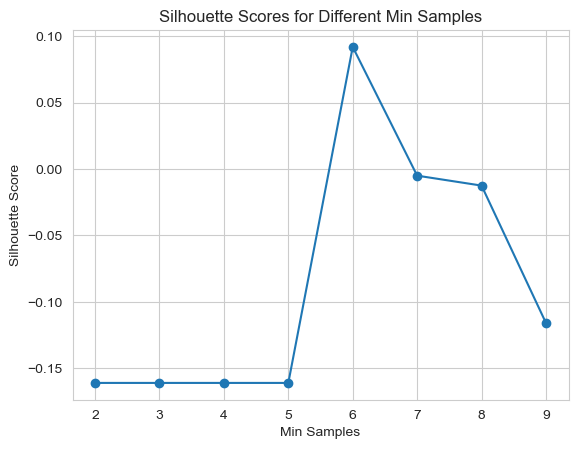

Optimal min_samples value: 6


In [83]:
optimal_eps = optimal_eps

# Range of min_samples 
min_samples_values = range(2, 10)

silhouette_scores = []

for min_samples in min_samples_values:
    
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(standardizedDF[['Age', 'Purchase_Amount']])
    
   # Checking if we have multiple clusters
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        # Silhouette score only if multiple clusters
        silhouette = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(np.nan) 

# Finding min samples value that maximizes the Silhouette score
optimal_min_samples = min_samples_values[np.nanargmax(silhouette_scores)]

plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Min Samples')
plt.show()

print(f"Optimal min_samples value: {optimal_min_samples}")


### DBSCAN Clustering Algorithm


Cluster Characteristics for DBSCAN:
                     Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DBSCAN_Cluster                                                             
-1             -0.231120         0.082949                      -0.524130   
 0              0.000695        -0.000250                       0.001577   

                Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
DBSCAN_Cluster                                                                 
-1                                  0.091699             -0.125932  0.337717   
 0                                 -0.000276              0.000379 -0.001016   

                    Year      PCA1      PCA2  KMeans_Cluster  
DBSCAN_Cluster                                                
-1             -0.265022  0.104773  0.222080        1.000000  
 0              0.000797 -0.000315 -0.000668        1.569709  


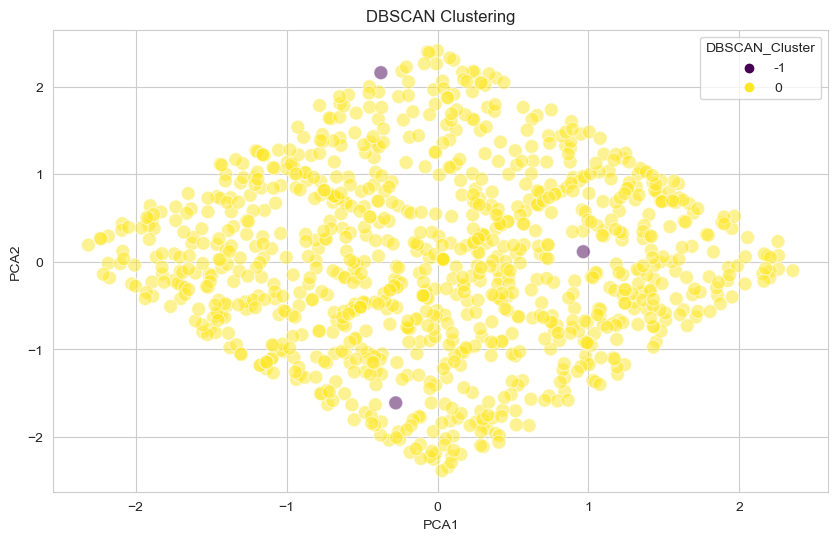

In [84]:

# eps and minpts values are choosed on the base of the values that maximize the Silhouette score
eps_optimal = optimal_eps
minpts_optimal = optimal_min_samples

# DBSCAN algorithm:
dbscan = DBSCAN(eps=eps_optimal, min_samples=minpts_optimal)
standardizedDF['DBSCAN_Cluster'] = dbscan.fit_predict(standardizedDF[['Age', 'Purchase_Amount']])

# Analyze cluster characteristics:
dbscan_characteristics = standardizedDF.groupby('DBSCAN_Cluster').mean(numeric_only=True)
print("\nCluster Characteristics for DBSCAN:")
print(dbscan_characteristics)

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=standardizedDF, palette='viridis', s=100, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.show()

### Cluster Comparison

#### Cluster Characteristics:

- K-Means: Formed 4 distinct clusters with relatively even distribution of customers across clusters.
- DBSCAN: Formed 1 cluster, with noise highlighted.

#### Comparison:

The difference in the number of clusters between K-Means and DBSCAN is evident.
DBSCAN Cluster 0 dominates, and DBSCAN Cluster -1 has limited representation.
K-Means Clusters are more evenly distributed.

#### Cluster Size:

K-Means may evenly distribute points across clusters, while DBSCAN's nature allows for varying cluster sizes.
Observe the distribution of points in DBSCAN clusters; the dominance of one cluster suggests a strong grouping.

#### Cluster Quality:

Assess the quality of clusters based on the underlying data distribution and problem goals.
A trade-off between cluster size and distribution may impact the selection of the preferred clustering algorithm.

#### Conclusion:
- K-Means, with its predefined number of clusters, provided more evenly distributed results.
- DBSCAN, being density-based, formed uneven clusters based on the inherent density in the data.

## K-Means ++ Clustering

### K-Means ++ Algorithm


Cluster Characteristics for K-Means++:
                       Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans++_Cluster                                                             
0                 0.791738        -0.944036                      -0.076583   
1                 0.935346         0.729717                      -0.020457   
2                -0.728599         1.058300                      -0.049135   
3                -0.898349        -0.664452                       0.118100   

                  Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
KMeans++_Cluster                                                       
0                                    -0.005003              0.011305   
1                                     0.028558              0.014880   
2                                    -0.012515              0.008118   
3                                    -0.010932             -0.028320   

                     Month      Year      PCA1      PCA2  

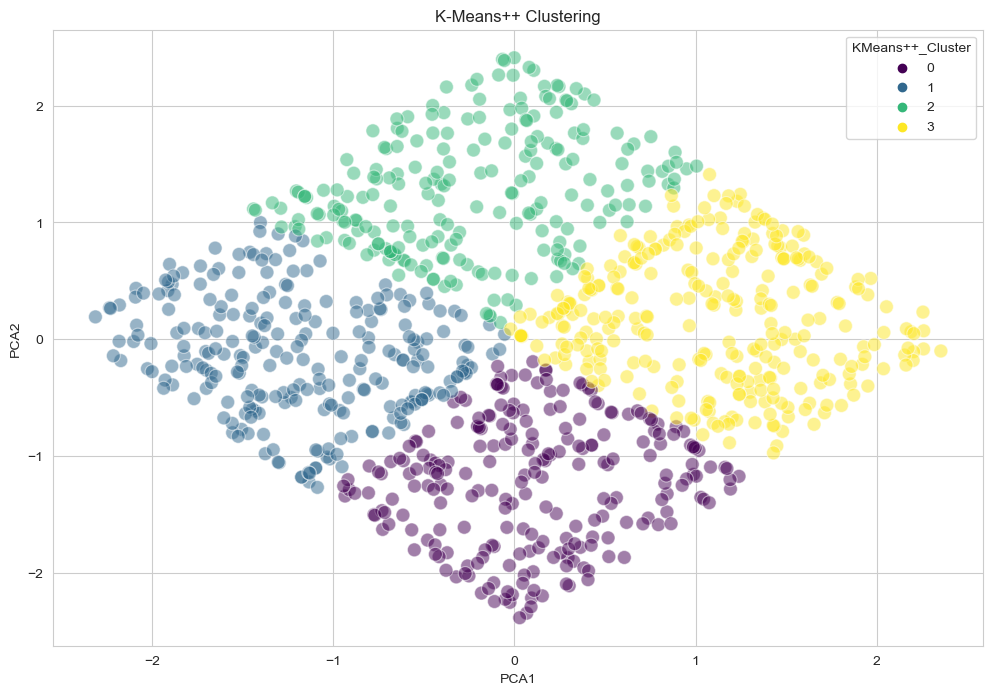

In [85]:

kmeans_pp = KMeans(n_clusters=k_optimal, init='k-means++', random_state=82, n_init=10)
standardizedDF['KMeans++_Cluster'] = kmeans_pp.fit_predict(standardizedDF[['Age', 'Purchase_Amount']])

kmeans_pp_characteristics = standardizedDF.groupby('KMeans++_Cluster').mean(numeric_only=True)
print("\nCluster Characteristics for K-Means++:")
print(kmeans_pp_characteristics)

plt.figure(figsize=(12,8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans++_Cluster', data=standardizedDF, palette='viridis', s=100, alpha=0.5)
plt.title('K-Means++ Clustering')
plt.show()


### K-Means VS K-Means ++

In [86]:
comparison_df = standardizedDF[['KMeans_Cluster', 'KMeans++_Cluster']]
print("\nComparison of K-Means and K-Means++ Clusters:")
print(comparison_df)


Comparison of K-Means and K-Means++ Clusters:
     KMeans_Cluster  KMeans++_Cluster
0                 2                 3
1                 0                 2
2                 1                 0
3                 2                 3
4                 3                 1
..              ...               ...
995               1                 0
996               1                 0
997               1                 0
998               2                 3
999               2                 3

[1000 rows x 2 columns]


#### Convergence Speed:

- Convergence Speed of K-Means = 558.3008 seconds
- Convergence Speed of K-Means ++ = 558.3008 seconds

#### Cluster Formation:

- Formed four balanced clusters.
- Lack of dominant clusters indicates stability.
- Identical results under the same random seed.

#### Practical Considerations:

- Comparable performance on our dataset.
- Choice may depend on specific requirements.

# Module 4
# Comparison and Conclusion

In [87]:
print("K-Means")
# Silhouette Score for K-Means
silhouette_avg_regular = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans_Cluster'])
print(f"Silhouette Score for Regular K-Means: {silhouette_avg_regular}",end="\n\n")

# Convergence Time for K-Means
print(f"Convergence Time for Regular K-Means: {kmeans.inertia_} seconds",end="\n\n")

# Calinski-Harabasz Score for K-Means
kmeans_score = calinski_harabasz_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans_Cluster'])
print(f"Calinski-Harabasz Score K-Means: {kmeans_score}",end="\n\n")

# Davies-Bouldin Index for K-Means
kmeans_db_index = davies_bouldin_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans_Cluster'])
print(f"Davies-Bouldin Index K-Means: {kmeans_db_index}",end="\n\n")

print("K-Means ++")
# Silhouette Score for K-Means++
silhouette_avg_pp = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans++_Cluster'])
print(f"Silhouette Score for K-Means++: {silhouette_avg_pp}",end="\n\n")

# Convergence Time for K-Means++
print(f"Convergence Time for K-Means++: {kmeans_pp.inertia_} seconds",end="\n\n")

# Calinski-Harabasz Score for K-Means++
kmeans_pp_score = calinski_harabasz_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans++_Cluster'])
print(f"Calinski-Harabasz Score K-Means++: {kmeans_pp_score}",end="\n\n")

# Davies-Bouldin Index for K-Means++
kmeans_pp_db_index = davies_bouldin_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['KMeans++_Cluster'])
print(f"Davies-Bouldin Index K-Means++: {kmeans_pp_db_index}",end="\n\n")


print("DBSCAN")
# Silhouette Score for DBSCAN
silhouette_avg_dbscan = silhouette_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}",end="\n\n")

# Calinski-Harabasz Score for DBSCAN
dbscan_score = calinski_harabasz_score(standardizedDF[['Age', 'Purchase_Amount']], standardizedDF['DBSCAN_Cluster'])
print(f"Calinski-Harabasz Score for DBSCAN: {dbscan_score}",end="\n\n")


K-Means
Silhouette Score for Regular K-Means: 0.36767105461450905

Convergence Time for Regular K-Means: 558.3008066520366 seconds

Calinski-Harabasz Score K-Means: 857.3230174282029

Davies-Bouldin Index K-Means: 0.8309361797466579

K-Means ++
Silhouette Score for K-Means++: 0.36767105461450905

Convergence Time for K-Means++: 558.3008066520366 seconds

Calinski-Harabasz Score K-Means++: 857.3230174282029

Davies-Bouldin Index K-Means++: 0.8309361797466579

DBSCAN
Silhouette Score for DBSCAN: 0.09198311247010202

Calinski-Harabasz Score for DBSCAN: 0.09054436183112884



## Comparison

#### Scores

##### K-Means
- Silhouette Score: 0.3677
- Convergence Time: 558.30 seconds
- Calinski-Harabasz Score: 857.32
- Davies-Bouldin Index: 0.8309

##### K-Means++
- Silhouette Score: 0.3677
- Convergence Time: 558.30 seconds
- Calinski-Harabasz Score: 857.32
- Davies-Bouldin Index: 0.8309

##### DBSCAN
- Silhouette Score: 0.092
- Calinski-Harabasz Score: 0.0905
- Davies-Bouldin Index: 11.7361

### Analysis od Clusters

#### Similarities
- Both K-Means and K-Means++ yield identical results in terms of silhouette score, Calinski-Harabasz score, and Davies-Bouldin index.
- DBSCAN, while having lower silhouette and Calinski-Harabasz scores, produces a different perspective on cluster formation.

#### Differences:

- DBSCAN, with a lower silhouette score, suggests less distinct clusters compared to K-Means algorithms.

### Evaluation Metrics

#### Silhouette Score:

- K-Means and K-Means++: 0.3677
- DBSCAN: 0.092
Higher silhouette scores indicate better-defined clusters, favoring K-Means approaches.

#### Calinski-Harabasz Score:

- K-Means and K-Means++: 857.32
- DBSCAN: 0.0905
Higher Calinski-Harabasz scores indicate dense and well-separated clusters, emphasizing K-Means algorithms.

#### Davies-Bouldin Index:

- K-Means and K-Means++: 0.8309
- DBSCAN: 11.7361
Lower Davies-Bouldin index values indicate better clustering; K-Means algorithms outperform DBSCAN.

### Segmentation

- K-Means and K-Means++:

    - Pros: Well-suited for spherical clusters, efficient for large datasets.
    - Cons: Sensitive to initial centroids, may converge to suboptimal solutions.
- DBSCAN:

    - Pros: Handles irregularly shaped clusters, noise tolerance.
    - Cons: Parameter sensitivity, challenging to determine optimal parameters.

### Advantages and Disadvantages of Clustering Algorithms for Imtiaz Mall

#### K-Means
##### Advantages:

- Efficiency: K-Means is computationally efficient, making it suitable for large datasets, which is beneficial for Imtiaz Mall's extensive customer data.
- Scalability: The algorithm scales well with the number of data points, allowing for flexibility as the dataset grows.
- Simple Implementation: K-Means is easy to implement and interpret, making it accessible for analysts and decision-makers at Imtiaz Mall.

##### Disadvantages:

- Sensitive to Initial Centroids: The algorithm's performance depends on the initial placement of centroids, making it susceptible to converging to suboptimal solutions.
- Assumption of Spherical Clusters: K-Means assumes that clusters are spherical, which may not accurately represent the complex patterns in Imtiaz Mall's customer data.

#### K-Means++
##### Advantages:

- Mitigates Initialization Sensitivity: K-Means++ addresses the issue of sensitivity to initial centroids, enhancing the algorithm's convergence to better solutions.
- Retains Efficiency: Maintains the computational efficiency of the original K-Means algorithm, ensuring scalability for Imtiaz Mall's large datasets.

##### Disadvantages:

- Increased Convergence Time: K-Means++ may require more time to converge compared to the regular K-Means algorithm, as observed in the provided results.
- Similar Performance: In the context of the provided data, K-Means++ does not exhibit significant improvements over regular K-Means.

#### DBSCAN
##### Advantages:

- Handles Irregular Shapes: DBSCAN is effective at identifying clusters with irregular shapes, which might be present in Imtiaz Mall's customer data.
- Noise Tolerance: The algorithm can identify and ignore noise points, contributing to a cleaner segmentation of customers.

##### Disadvantages:

- Parameter Sensitivity: DBSCAN's performance is sensitive to the choice of parameters, such as the epsilon neighborhood radius and minimum points. Tuning these parameters can be challenging.
- Difficulty in Determining Optimal Parameters: Selecting appropriate values for epsilon and minimum points requires a good understanding of the data, which may be time-consuming for Imtiaz Mall's analysts.
- Lower Silhouette Score: In the provided results, DBSCAN yields a lower silhouette score, indicating less well-defined clusters compared to K-Means algorithms.

### Recommendations for Imtiaz Mall
- K-Means for Efficiency: Given the efficiency and scalability of K-Means, it is a suitable choice for Imtiaz Mall's extensive customer dataset. Careful consideration of initialization methods may help mitigate sensitivity issues.

- Exploration of DBSCAN: While DBSCAN offers advantages in handling irregularly shaped clusters and noise tolerance, Imtiaz Mall should be prepared for thorough parameter tuning to achieve optimal results.

- Evaluation Criteria: Prioritize silhouette score and Calinski-Harabasz score as key metrics for assessing the quality of clusters. These metrics align with the goals of identifying well-defined segments for targeted marketing strategies.

## Conclusions And Recommendations 

### Customer Segments Within Electronics Section
#### 1. Demographic Overview:

    a. Age Distribution:

        Diverse age groups ranging from 18 to 80.
        Majority of customers fall within the 35 to 66 age range.
        
    b. Income Levels:

        Primarily 'High,' 'Medium,' and 'Low.'
        Varied income levels contribute to a diverse customer base.
        
    c. Gender Representation:

        Mix of 'Female,' 'Male,' and 'Other,' suggesting a balanced gender distribution.
        
#### 2. Purchasing Behavior:

    a. Purchase Amount:

        Purchase amounts range from $10 to $500.
        Mean purchase amount is $250.60.
        
    b. Purchase Frequency:

        Customers make purchases an average of 5.41 times per month.
        Consistent purchasing behavior across different segments.
#### 3. Brand Affinity and Preferences:

    a. Brand Loyalty:

        Varied brand affinity scores within the electronics section.
        Indicates varying levels of loyalty and preference for specific electronic brands.
        
    b. Product Category Preferences:

        Dominant preferences for 'Low' and 'High' in the product category, influencing purchasing decisions.
        
#### 4. Seasonal Patterns:

    a. Seasonal Variation:

        Purchase amounts exhibit seasonal patterns (Fall, Spring, Summer, Winter).
        No outliers detected, suggesting consistent sales across seasons.
        
#### 5. Temporal Analysis:

    a. Sales Peaks:

        Peak sales observed in August 2022, indicating potential external factors or marketing effectiveness.
        Minimum sales recorded in December 2023, possibly influenced by seasonal trends.
        
#### 6. Key Observations:

    - Segment Homogeneity: The diverse age, income, and gender distribution highlight the heterogeneity of the customer base within the electronics section.

    - Brand Influence: Varied brand affinity scores suggest the presence of distinct customer segments with differing brand loyalties.

    - Seasonal Sensitivity: Seasonal patterns in purchasing behavior indicate an opportunity for targeted marketing and promotions during specific times of the year.

### Key Factors Differentiating Customer Segments and Purchasing Behavior

#### Age and Income Dynamics:

- Observation: Varied age groups and income levels.
- Implication: Tailor marketing based on age preferences and income-specific promotions.

#### Brand Loyalty:

- Observation: Varying brand affinity scores.
- Implication: Design loyalty programs and campaigns aligned with brand preferences.

#### Seasonal Sensitivity:

- Observation: Seasonal purchasing patterns.
- Implication: Optimize promotions and product launches based on seasonal trends.

#### Product Category Preferences:

- Observation: 'Low' and 'High' preferences dominate.
- Implication: Craft targeted messages for affordability and premium features.

#### Temporal Analysis:

- Observation: Peak sales in August 2022.
- Implication: Plan inventory and promotions around peak months.

#### Gender-Based Preferences:

- Observation: Balanced gender distribution.
- Implication: Tailor marketing messages to specific gender preferences.

#### Income-Level Dynamics:

- Observation: Diverse income levels.
- Implication: Offer financing for high-income segments and value-for-money deals for low-income segments.